# Лабораторна 1 — Марковські процеси

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import beta, norm

rng = np.random.default_rng(42)
from task_1 import task_1



## Завдання 1

![Task1](../Images/1.png)

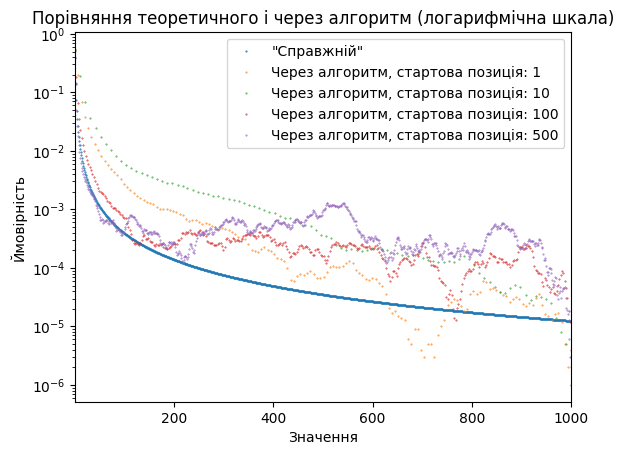

In [5]:
task_1(i_lims = [1, 1000], n = int(1e6), start_pos = [1, 10, 100, 500])

## Завдання 2

![Task1](../Images/2.png)

NameError: name 'samples' is not defined

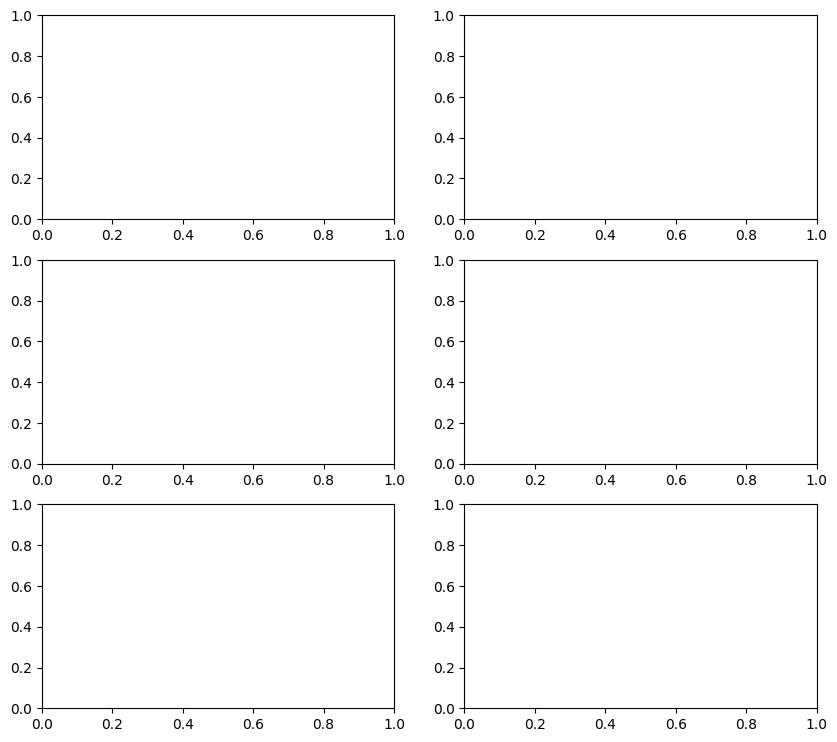

In [3]:
def thinning(x, k):
    return x[::k]

ks = [1, 10, 50]
fig, axs = plt.subplots(len(ks), 2, figsize=(10, 3*len(ks)))
def acf(x, lag=50):
    x = np.array(x) - np.mean(x)
    denom = np.sum(x*x)
    return [np.sum(x[:len(x)-l]*x[l:])/denom for l in range(lag)]
for idx,k in enumerate(ks):
    xs = thinning(samples, k)
    axs[idx,0].hist(xs, bins=range(1,101), density=True)
    axs[idx,0].set_title(f'Гістограма (k={k}) — перші 100 бінів')
    acf_vals = acf(xs, lag=50)
    axs[idx,1].plot(acf_vals)
    axs[idx,1].set_title(f'ACF (k={k})')
plt.tight_layout(); plt.show()

## Завдання 3 — 1D Ising (поведінка при різних β)

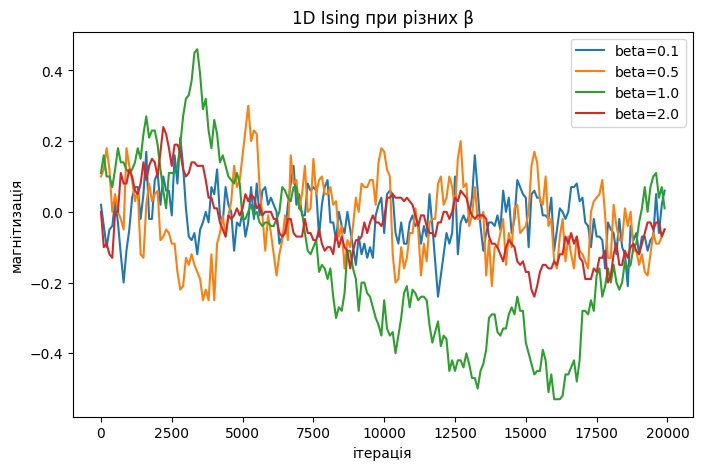

In [ ]:
def ising_1d(beta, L=200, n_iter=20000):
    spins = rng.choice([-1,1], size=L)
    mags = []
    for t in range(n_iter):
        i = rng.integers(0, L)
        left = spins[(i-1)%L]; right = spins[(i+1)%L]
        delta_E = 2*spins[i]*(left+right)
        if delta_E <= 0 or rng.random() < np.exp(-beta*delta_E):
            spins[i] *= -1
        if t % 100 == 0:
            mags.append(spins.mean())
    return np.array(mags)

betas = [0.1, 0.5, 1.0, 2.0]
plt.figure(figsize=(8,5))
for b in betas:
    m = ising_1d(b)
    plt.plot(np.arange(len(m))*100, m, label=f'beta={b}')
plt.xlabel('ітерація'); plt.ylabel('магнітизація'); plt.legend(); plt.title('1D Ising при різних β'); plt.show()

## Завдання 4 — MCMC для Beta(a,b)

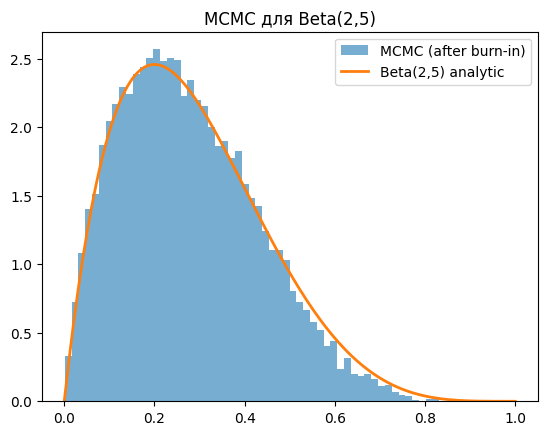

In [ ]:
def sample_beta_mcmc(a, b, n=20000, sigma=0.1):
    x = np.zeros(n)
    cur = 0.5
    for t in range(n):
        prop = cur + rng.normal(0, sigma)
        if prop < 0: prop = -prop
        if prop > 1: prop = 2-prop
        p_cur = (cur**(a-1))*((1-cur)**(b-1))
        p_prop = (prop**(a-1))*((1-prop)**(b-1))
        if rng.random() < min(1, p_prop/p_cur):
            cur = prop
        x[t] = cur
    return x

x_beta = sample_beta_mcmc(2,5, n=30000, sigma=0.05)
plt.hist(x_beta[5000:], bins=60, density=True, alpha=0.6, label='MCMC (after burn-in)')
xs = np.linspace(0,1,200)
from scipy.stats import beta as sp_beta
plt.plot(xs, sp_beta.pdf(xs, 2,5), label='Beta(2,5) analytic', linewidth=2)
plt.legend(); plt.title('MCMC для Beta(2,5)'); plt.show()

## Завдання 5 — Апостеріорний розподіл і вплив масштабу пропозиції

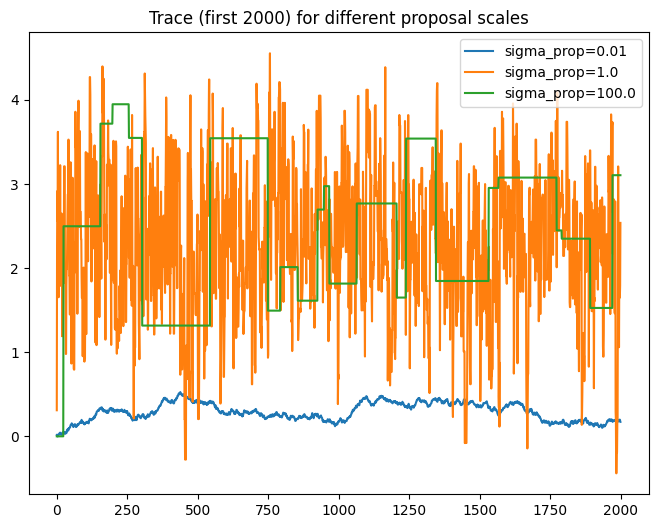

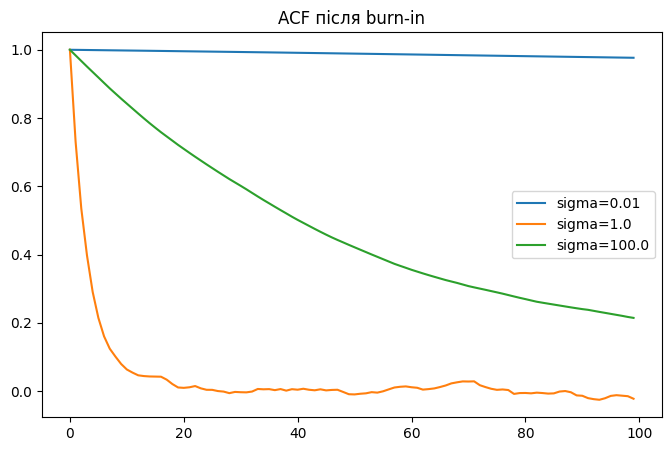

In [ ]:
y = 3.0; sigma2 = 1.0; tau2 = 4.0
def log_posterior(theta):
    return -0.5*(theta**2)/tau2 -0.5*(y-theta)**2/sigma2

def mcmc_rw(logpdf, n, prop_sigma):
    x = np.zeros(n)
    cur = 0.0; lcur = logpdf(cur)
    for t in range(n):
        prop = cur + rng.normal(0, prop_sigma)
        lprop = logpdf(prop)
        if np.log(rng.random()) < (lprop - lcur):
            cur, lcur = prop, lprop
        x[t] = cur
    return x

scales = [0.01, 1.0, 100.0]
traces = {s: mcmc_rw(log_posterior, 20000, s) for s in scales}

plt.figure(figsize=(8,6))
for s in scales:
    plt.plot(traces[s][:2000], label=f'sigma_prop={s}')
plt.legend(); plt.title('Trace (first 2000) for different proposal scales'); plt.show()

def acf_scalar(x, lag=100):
    x = x - x.mean()
    res = [np.correlate(x, np.roll(x, -k))[0] for k in range(lag)]
    return np.array(res) / res[0]

plt.figure(figsize=(8,5))
for s in scales:
    a = acf_scalar(traces[s][5000:], lag=100)
    plt.plot(a, label=f'sigma={s}')
plt.legend(); plt.title('ACF після burn-in'); plt.show()

## Завдання 6 — Генерація 2000 точок з біваріатного нормального розподілу

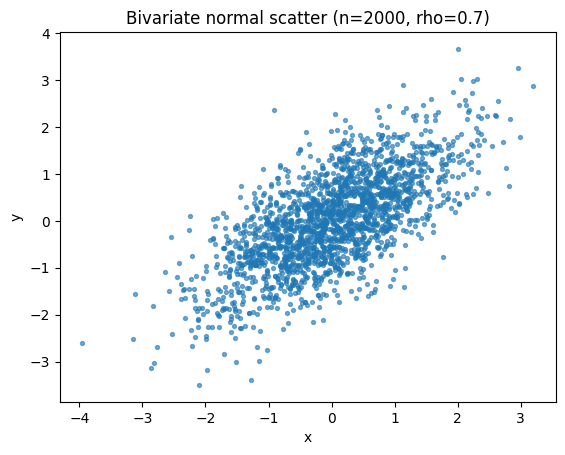

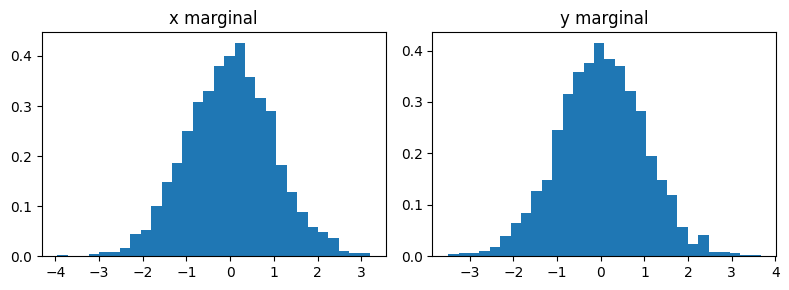

In [ ]:
n = 2000; rho = 0.7
cov = [[1, rho],[rho,1]]
data = rng.multivariate_normal([0,0], cov, size=n)
plt.scatter(data[:,0], data[:,1], s=8, alpha=0.6)
plt.title(f'Bivariate normal scatter (n={n}, rho={rho})'); plt.xlabel('x'); plt.ylabel('y'); plt.show()

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.hist(data[:,0], bins=30, density=True); plt.title('x marginal')
plt.subplot(1,2,2); plt.hist(data[:,1], bins=30, density=True); plt.title('y marginal')
plt.tight_layout(); plt.show()